In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/food_nutrition.csv')
data.head()

,Type,Description,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
0,Poultry Products,"Turkey, all classes, wing, meat and skin, raw",20.22,12.32,0.00,0.00,0.0,3
1,Fruits and Fruit Juices,"Pears, raw, green anjou",0.44,0.10,15.79,9.73,3.1,1
2,Fruits and Fruit Juices,"Maraschino cherries, canned, drained",0.22,0.21,41.97,38.77,3.2,2
3,Poultry Products,"Chicken, stewing, meat only, cooked, stewed",30.42,11.89,0.00,0.00,0.0,34
4,Breakfast Cereals,"Cereals ready-to-eat, wheat and bran, presweet...",7.10,5.60,76.20,23.60,9.7,410


# 1a)

The United States Department of Agriculture (USDA) has its National Nutrient Database which
compiles the nutritional information of food products. A subset of the data on food products is
in the data file food_nutrition.csv. The amount of nutrients per 100g of each food product is
measured.

Simple Exploratory Data Analysis

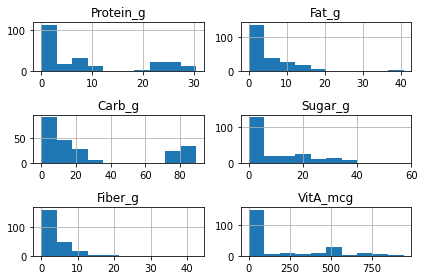

In [3]:
data[['Protein_g','Fat_g','Carb_g', 'Sugar_g', 'Fiber_g','VitA_mcg' ]].hist()
plt.tight_layout()
plt.show()

Different magnitudes

In [4]:
data.describe()

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,8.908462,4.803803,28.265556,11.064573,3.702991,187.047009
std,9.830258,6.560120,32.084279,12.569516,4.405083,261.453321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.100000,0.200000,6.640000,1.185000,1.200000,2.000000
50%,4.850000,2.100000,14.400000,3.830000,2.600000,32.500000
75%,12.132500,7.300000,74.465000,19.667500,5.175000,383.750000
max,30.420000,40.680000,89.300000,57.190000,42.500000,943.000000


In [5]:
data_reduced = data.drop(['Type', 'Description'], axis=1)
data_reduced.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
0,20.22,12.32,0.00,0.00,0.0,3
1,0.44,0.10,15.79,9.73,3.1,1
2,0.22,0.21,41.97,38.77,3.2,2
3,30.42,11.89,0.00,0.00,0.0,34
4,7.10,5.60,76.20,23.60,9.7,410


## Scaling

In [6]:
from sklearn.preprocessing import scale
# scaling the data before PCA
data_reduced = pd.DataFrame(scale(data_reduced), columns=data_reduced.columns)
data_reduced.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
0,1.153152,1.148197,-0.882867,-0.882157,-0.842420,-0.705447
1,-0.863316,-0.718567,-0.389671,-0.106403,-0.137179,-0.713113
2,-0.885743,-0.701763,0.428055,2.208901,-0.114429,-0.709280
3,2.192989,1.082509,-0.882867,-0.882157,-0.842420,-0.586625
4,-0.184363,0.121629,1.497219,0.999426,1.364302,0.854573


# 1b)

In [7]:
pca_ = PCA(n_components=6).fit(data_reduced)
# Pick components = 6
#Note that pca.transform() returns scores based on centred data
pca_samples = pca_.transform(data_reduced)

In [8]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys())
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions 
    
    #PCA cumulative variance explained
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1)
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance'])
    cum_variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis = 1)

In [9]:
pca_results = pca_results(data_reduced, pca_)
pca_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
PC 1,3.3609,0.5578,0.5578,-0.2884,-0.2594,0.5052,0.4757,0.4466,0.4106
PC 2,1.6162,0.2682,0.8260,0.6283,0.6547,0.2250,0.1195,0.1158,0.3136
PC 3,0.4188,0.0695,0.8955,0.1016,-0.0431,-0.1233,-0.4933,0.8411,-0.1477
PC 4,0.3982,0.0661,0.9616,-0.0793,-0.1393,-0.1604,-0.4999,-0.1705,0.8183
PC 5,0.1595,0.0265,0.9880,-0.7065,0.6943,-0.0963,-0.0447,0.0842,0.0211
PC 6,0.0722,0.0120,1.0000,0.0796,-0.0286,-0.8025,0.5140,0.2085,0.2030


<Figure size 432x288 with 0 Axes>

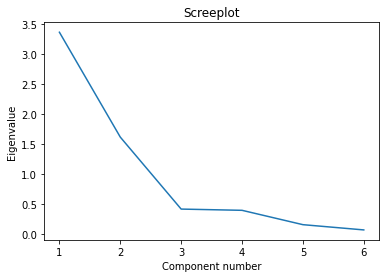

In [10]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca_.explained_variance_)+1), pca_.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

In [11]:
#Extract only the two PCs
pca2 = PCA(n_components=2).fit(data_reduced)
scores2 = pca2.transform(data_reduced)

In [12]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=9, height=9, margin=0.2):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.2
    colors = sns.color_palette( as_cmap= True) 
    


    for i, v in enumerate(pca.components_.T):
        # display(colors[i])
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color=colors[i] , label = data.columns[i] )

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    ax.legend() 
    
    return ax

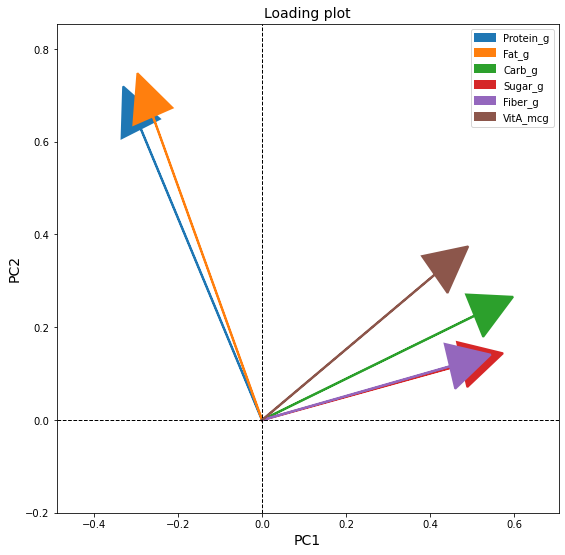

In [13]:
loadingplot(data_reduced,pca_)
plt.show()

### Example:
Some notes to interpret a loading plot:
- PC1 on horizontal,pc2 on vertical.
- For e.g loading on oranges on PC1, .22, Corresponds to a positive loading on PC1,
- **Pay attention to direction of loading/magnitude of loading**
- Loading for burger, etc is pointing to positive direction, oranges pointing to -ve direction, measures a constrast. 
Looking at the loading plot, the loadings for protein, fat on PC1, -0.2884, and -0.2594 respectively, correspond to a negative loading. 

# 1c)

In [14]:
#Obtain scores from original data that are not centred

scores_notcentred = np.dot(data_reduced, pca2.components_.T)
scores_notcentred = pd.DataFrame(scores_notcentred, columns = ['PC1', 'PC2'])
scores_notcentred.head()

,PC1,PC2
0,-2.161909,0.853362
1,-0.166195,-1.352740
2,1.362076,-0.891322
3,-2.395938,1.500917
4,2.213658,0.846074


In [15]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=15, height=8, margin=0.5,text = None):
    plt.figure(figsize=(width, height))
    sns.set_style('darkgrid')
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores,hue=data.Type)
    
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin
        
    text_pos = 30


    # Print text
    if text:
        ax.text(0.14, -1.27,'Here', color='black', ha='center', va='center', fontsize=12)
    # for i, v in enumerate(np.array(scores)):
    #     ax.text(v[0], v[1]+text_pos, data.iloc[i,0], color='black', ha='center', va='center', fontsize=12)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax

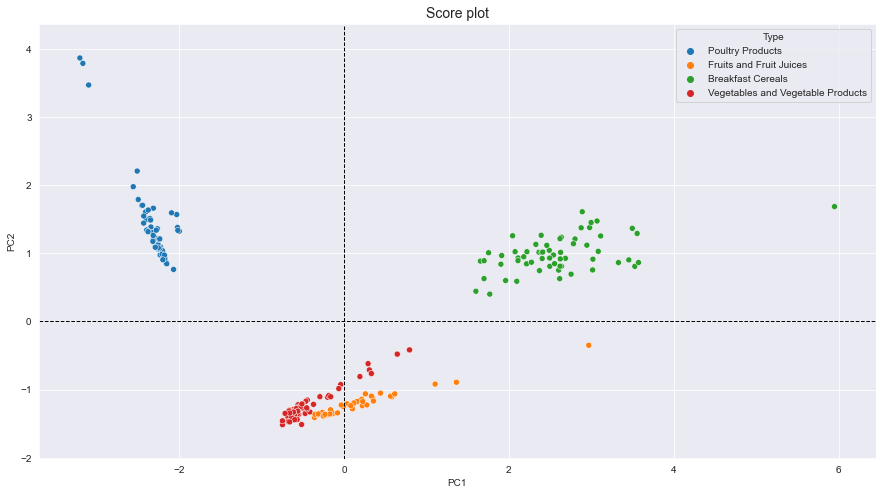

In [16]:
scoreplot_label(data,scores_notcentred, pca2)
plt.show()

# 1d)

Scrutinize standard deviation and mean

$$z = \frac {(x-mean)}{std}$$

In [17]:
data.describe()

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,8.908462,4.803803,28.265556,11.064573,3.702991,187.047009
std,9.830258,6.560120,32.084279,12.569516,4.405083,261.453321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.100000,0.200000,6.640000,1.185000,1.200000,2.000000
50%,4.850000,2.100000,14.400000,3.830000,2.600000,32.500000
75%,12.132500,7.300000,74.465000,19.667500,5.175000,383.750000
max,30.420000,40.680000,89.300000,57.190000,42.500000,943.000000


Protein: 0.3 g Sugar: 16.7 g
Fat: 0.1 g Fiber: 2.9 g
Carbohydrate: 19.6 g Vitamin A: 2 mcg

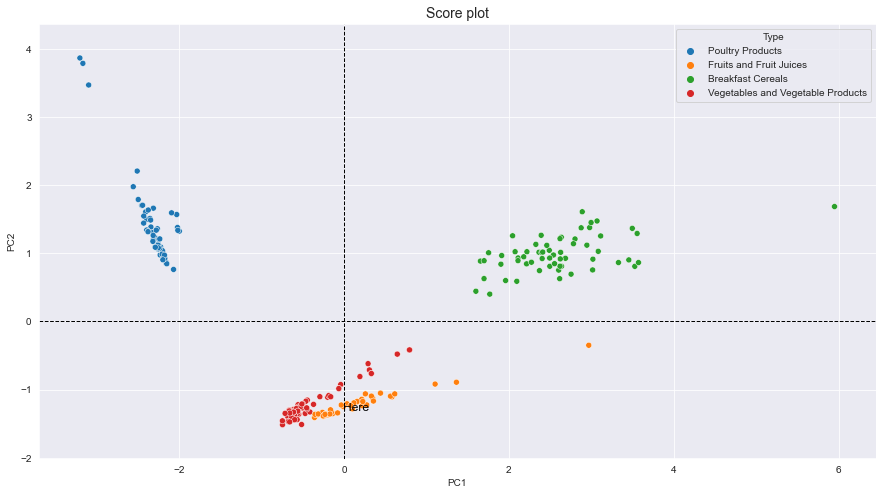

In [18]:
scoreplot_label(data,scores_notcentred, pca2,text=True)
plt.show()